In [2]:
import pandas as pd
df = pd.read_csv('Iris.csv')

In [4]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
X=df.drop(columns=['Species'])
Y=df['Species']

In [9]:
missing_values = df.isnull().sum()
print(missing_values)

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)
Scaled_df =pd.DataFrame(scaled_data,columns=X.columns)

In [40]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42)  # Setting n_clusters to 3 for the 3 species
kmeans.fit(scaled_data)

KMeans(n_clusters=3, random_state=42)

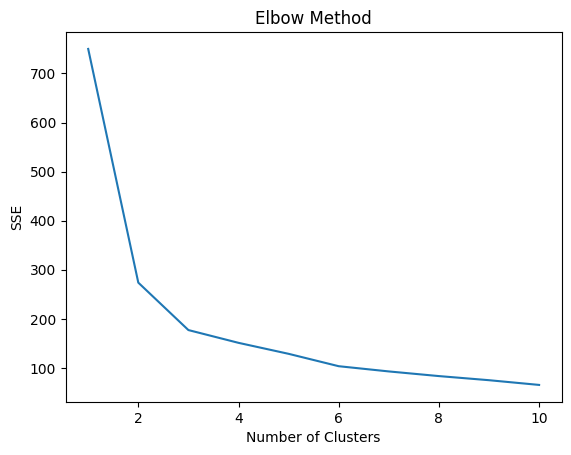

In [17]:
#labels = kmeans.labels_
#import matplotlib.pyplot as plt

#sse = []
#for k in range(1, 11):
#    kmeans = KMeans(n_clusters=k)
#    kmeans.fit(scaled_data)
#    sse.append(kmeans.inertia_)

#plt.plot(range(1, 11), sse)
#plt.title('Elbow Method')
#plt.xlabel('Number of Clusters')
#plt.ylabel('SSE')
#plt.show()



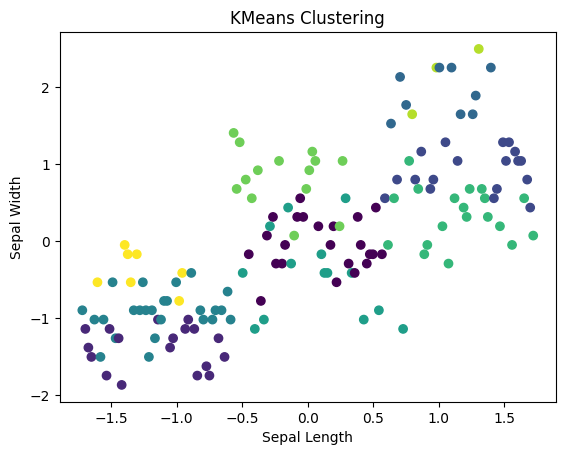

In [41]:
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=labels, cmap='viridis')
plt.title('KMeans Clustering')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()


In [26]:
cluster_counts = pd.Series(labels).value_counts().sort_index()

# Print the counts of the clusters
print("Counts of each cluster:")
print(cluster_counts)

Counts of each cluster:
0    47
1    53
2    50
Name: count, dtype: int64


In [43]:
import numpy as np

# Get the cluster labels and centroids
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Find the closest instance to each centroid
centroid_instances = []
for centroid in centroids:
    # Compute the distances from the centroid to all points
    distances = np.linalg.norm(scaled_data - centroid, axis=1)
    closest_index = np.argmin(distances)  # Index of the closest point
    centroid_instances.append(closest_index)

# Map the closest indices to the original dataset
centroid_selected_instances = df.iloc[centroid_instances]

# Print the selected instances that correspond to the centroids
for i, index in enumerate(centroid_instances):
    print(f"Instance selected as centroid for Cluster {i}:")
    print(centroid_selected_instances.iloc[i])
    print(f"Instance number in original dataset: {index}\n")

Instance selected as centroid for Cluster 0:
Id                          113
SepalLengthCm               6.8
SepalWidthCm                3.0
PetalLengthCm               5.5
PetalWidthCm                2.1
Species          Iris-virginica
Cluster                       0
Name: 112, dtype: object
Instance number in original dataset: 112

Instance selected as centroid for Cluster 1:
Id                            83
SepalLengthCm                5.8
SepalWidthCm                 2.7
PetalLengthCm                3.9
PetalWidthCm                 1.2
Species          Iris-versicolor
Cluster                        1
Name: 82, dtype: object
Instance number in original dataset: 82

Instance selected as centroid for Cluster 2:
Id                        27
SepalLengthCm            5.0
SepalWidthCm             3.4
PetalLengthCm            1.6
PetalWidthCm             0.4
Species          Iris-setosa
Cluster                    2
Name: 26, dtype: object
Instance number in original dataset: 26



In [47]:
print(Y[112],Y[82],Y[26])

Iris-virginica Iris-versicolor Iris-setosa


In [48]:
# Choose a specific cluster number (e.g., cluster 0)
specific_cluster = 0

# Get the instance numbers (indices) of the data points in the specific cluster
instance_indices = np.where(labels == specific_cluster)[0]

# Print the instance numbers and the corresponding data points
print(f"Instance numbers for Cluster {specific_cluster}:")
for index in instance_indices:
    print(f"Instance Number: {index}, Data: {df.iloc[index].values}")

Instance numbers for Cluster 0:
Instance Number: 77, Data: [78 6.7 3.0 5.0 1.7 'Iris-versicolor' 0]
Instance Number: 86, Data: [87 6.7 3.1 4.7 1.5 'Iris-versicolor' 0]
Instance Number: 100, Data: [101 6.3 3.3 6.0 2.5 'Iris-virginica' 0]
Instance Number: 102, Data: [103 7.1 3.0 5.9 2.1 'Iris-virginica' 0]
Instance Number: 103, Data: [104 6.3 2.9 5.6 1.8 'Iris-virginica' 0]
Instance Number: 104, Data: [105 6.5 3.0 5.8 2.2 'Iris-virginica' 0]
Instance Number: 105, Data: [106 7.6 3.0 6.6 2.1 'Iris-virginica' 0]
Instance Number: 107, Data: [108 7.3 2.9 6.3 1.8 'Iris-virginica' 0]
Instance Number: 108, Data: [109 6.7 2.5 5.8 1.8 'Iris-virginica' 0]
Instance Number: 109, Data: [110 7.2 3.6 6.1 2.5 'Iris-virginica' 0]
Instance Number: 110, Data: [111 6.5 3.2 5.1 2.0 'Iris-virginica' 0]
Instance Number: 111, Data: [112 6.4 2.7 5.3 1.9 'Iris-virginica' 0]
Instance Number: 112, Data: [113 6.8 3.0 5.5 2.1 'Iris-virginica' 0]
Instance Number: 114, Data: [115 5.8 2.8 5.1 2.4 'Iris-virginica' 0]
Inst